Aplique a pipeline de NPR (Non Photorealistic Rendering)  à imagem https://github.com/kevinruiz182/image_processing_tools/blob/main/images/color_image_processing/bald_eagle_portrait.jpg com as seguintes modificações:
- O "step" na função de quantização é calculado da mesma forma que na original e ⌊x⌋ representa a função piso;
- Os limiares menor e maior passados ao algoritmo de Canny devem ser 40 e 70, respectivamente.

Assinale abaixo, o valor mais próximo das médias, após a pipeline alterada, dos canais R, G e B nesta mesma ordem.

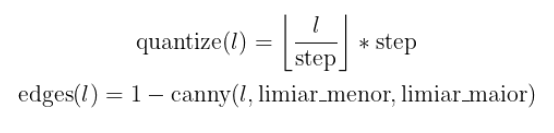

In [1]:
from skimage import io, color
from skimage.feature import canny
import numpy as np

# Load the image
image_path = '/content/bald_eagle_portrait.jpg'
image_rgb = io.imread(image_path).astype(float)  # Convert to float to prevent data type issues during processing

# Define the quantization function
def quantize(image, levels):
    max_val = 255.0
    step = max_val / (levels - 1)
    quantized_image = np.floor(image / step) * step
    return quantized_image

# Define a function to process the image with quantization and Canny edge detection
def process_image(image, levels, low_threshold, high_threshold):
    # Quantize the image
    quantized_image = quantize(image, levels)
    # Convert to grayscale for edge detection
    gray_image = color.rgb2gray(quantized_image)
    # Detect edges
    edges = canny(gray_image, low_threshold=low_threshold, high_threshold=high_threshold)
    # Invert edges to match the description
    edges_inv = np.invert(edges).astype(float)
    # Apply the edges as a mask to the quantized image
    final_image = quantized_image * np.stack((edges_inv,) * 3, axis=-1)
    return final_image

# Define the options for comparison
options = {
    'a': np.array([0.267, 0.229, 0.191]),
    'b': np.array([0.277, 0.238, 0.201]),
    'c': np.array([0.312, 0.421, 0.089]),
    'd': np.array([0.299, 0.587, 0.114])
}

# Process the image with the specified number of levels and Canny thresholds
levels = 16
low_threshold = 40
high_threshold = 70
processed_image = process_image(image_rgb, levels, low_threshold, high_threshold)

# Calculate the mean values of the R, G, B channels
mean_vals = processed_image.mean(axis=(0, 1)) / 255

# Find which option the result is closest to
closest_option = min(options.items(), key=lambda x: np.linalg.norm(mean_vals - x[1]))
(closest_option[0], levels, mean_vals)


('a', 16, array([0.26942892, 0.2308691 , 0.1922771 ]))